# client project :-PM-PR-0019

# PROJECT TEAM ID :- PTID-CDS-jun-24-1963

In [1]:
#!pip install mysql-connector
#!pip install xgboost 
#!pip install imbalanced-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import warnings 
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression,Lasso,Ridge,RANSACRegressor,ElasticNet
from sklearn.neighbors import KNeighborsClassifier,LocalOutlierFactor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier,VotingClassifier,IsolationForest
from xgboost import XGBClassifier
from sklearn.decomposition import PCA,FastICA
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler,MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.neural_network import MLPClassifier

In [3]:
cnx = mysql.connector.connect(
    host="18.136.157.135",
    user="dm_team2",
    password="DM!$Team&27@9!20!",
    database="project_sales",
    use_pure=True
)

In [4]:
query="select*from data"
df=pd.read_sql(query,cnx)
display(df)

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


In [5]:
df.to_csv(r"D:\ML dataset.csv")

###  Basic checks..

In [6]:
df.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


In [7]:
df.tail()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry
7421,28-04-2018 07:54,25,Website,,cXXXXXXX@gmail.com,Sales-Agent-3,Chennai,Mode-1,CONVERTED


In [8]:
df.sample(4)

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
338,02-11-2018 15:09,15,Call,953XXXXXXX,#VALUE!,Sales-Agent-7,Other Locations,Mode-5,Junk Lead
3982,22-07-2018 16:40,9,Call,776XXXXXXX,sXXXXXXX@gmail.com,Sales-Agent-3,Bangalore,Mode-1,LOST
6068,31-05-2018 14:16,9,Just Dial,,#VALUE!,Sales-Agent-7,Bangalore,Mode-1,LOST
3398,06-08-2018 16:32,18,Call,831XXXXXXX,#VALUE!,Sales-Agent-5,Chennai,Mode-1,LOST


In [9]:
row,column=df.shape
print(row,"rows & ",column,"columns")

7422 rows &  9 columns


In [10]:
df.size

66798

In [11]:
df.isna().sum()

Created          0
Product_ID       0
Source           0
Mobile           0
EMAIL            0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

In [12]:
df.columns

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status'],
      dtype='object')

In [13]:
df.count()

Created          7422
Product_ID       7422
Source           7422
Mobile           7422
EMAIL            7422
Sales_Agent      7422
Location         7422
Delivery_Mode    7422
Status           7422
dtype: int64

In [14]:
df.nunique().sort_values(ascending=False)

Created          6752
EMAIL             883
Mobile            487
Product_ID         30
Source             26
Location           18
Sales_Agent        13
Status             11
Delivery_Mode       5
dtype: int64

In [15]:
df["Status"].unique()

array(['Open', 'Potential', 'In Progress Positive', 'Not Responding',
       'Just Enquiry', 'Junk Lead', 'CONVERTED', 'In Progress Negative',
       'LOST', 'Long Term', 'converted'], dtype=object)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7422 non-null   object
 2   Source         7422 non-null   object
 3   Mobile         7422 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7422 non-null   object
 6   Location       7422 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: object(9)
memory usage: 522.0+ KB


In [17]:
df["Sales_Agent"].value_counts()

Sales-Agent-4     1500
Sales-Agent-11    1420
Sales-Agent-5     1190
Sales-Agent-9      879
Sales-Agent-3      781
Sales-Agent-7      736
Sales-Agent-2      389
Sales-Agent-12     269
Sales-Agent-6      114
Sales-Agent-8       68
Sales-Agent-10      49
                    23
Sales-Agent-1        4
Name: Sales_Agent, dtype: int64

In [18]:
df['Created'] = pd.to_datetime(df['Created'], format='%d-%m-%Y %H:%M')
df['year'] = df['Created'].apply(lambda x: x.year)
df['month'] = df['Created'].apply(lambda x: x.month)

* All the sales related dataset  easily or quickly understand the sales effectiveness mostly depends on month or year.
this reason also we are split the ***14-11-2018 10:05*** this format to separate the feature on year and month(discrete numeric value)format.
* Time (conttinuous numeric value) so no need in sales effectivenes analysis.

In [19]:
df["Status"]=df["Status"].replace({'Open':"high potential", 'Potential':"high potential",'In Progress Positive':"high potential", 
                                  'Just Enquiry':"high potential",'converted':"high potential",'CONVERTED':"high potential"})
df["Status"]=df["Status"].replace({'Not Responding':"low potential", 'Junk Lead':"low potential",
                                   'In Progress Negative':"low potential", 'LOST':"low potential", 'Long Term':"low potential"})

* The given features "Open", "Potential", "In Progress Positive", "Not Responding", "Just Enquiry", "Junk Lead", "CONVERTED", "In Progress Negative", "LOST", "Long Term", "converted" represent different categories or statuses related to sales effectiveness.

* Based on the information provided, it appears that these features are part of a labeled dataset, where each data point (or instance) is associated with a specific sales effectiveness category. In supervised learning, the goal is to build a model that can predict or classify new instances based on the given labeled data.

* Therefore, if you have corresponding labeled data for these features, the task of predicting or classifying sales effectiveness based on these features would fall under supervised learning. You would typically have a target variable or label that represents the desired outcome (e.g., "High Potential" or "Low Potential"), and you can train a supervised learning model using this labeled data to make predictions on new, unseen instances.

In [20]:
df["Status"].value_counts()

low potential     4377
high potential    3045
Name: Status, dtype: int64

In [21]:
df["Source"].value_counts()

Call                             2547
Live Chat-Direct                 1834
Website                          1594
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        137
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      50
By Recommendation                  32
CRM form                           23
Existing Customer                  22
Live Chat-Google Ads               21
Campaign                           19
                                   17
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Quora                     2
Other                               2
SMS Campaign                        2
Live Chat-Youtube                   2
E-Mail Message                      1
Live Chat-Justdial                  1
Name: Source

In [22]:
df["Location"].value_counts()

Other Locations    2500
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
UAE                  79
                     58
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: Location, dtype: int64

## EDA(Exploratory Data Analysis)

In [23]:
enc=LabelEncoder()
df["Delivery_Mode"]=enc.fit_transform(df["Delivery_Mode"])
df["Sales_Agent"]=enc.fit_transform(df["Sales_Agent"])

In [24]:
df

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,year,month
0,2018-11-14 10:05:00,,Website,984XXXXXXX,aXXXXXXX@gmail.com,3,,4,high potential,2018,11
1,2018-11-14 09:22:00,,Website,XXXXXXX,#VALUE!,2,,4,high potential,2018,11
2,2018-11-14 09:21:00,,Website,XXXXXXX,dXXXXXXX@yahoo.com,2,,4,high potential,2018,11
3,2018-11-14 08:46:00,,Website,XXXXXXX,wXXXXXXX@gmail.com,2,,4,high potential,2018,11
4,2018-11-14 07:34:00,,Website,XXXXXXX,cXXXXXXX@gmail.com,2,,4,high potential,2018,11
...,...,...,...,...,...,...,...,...,...,...,...
7417,2018-04-28 09:45:00,9,Call,,aXXXXXXX@gmail.com,9,Mumbai,3,low potential,2018,4
7418,2018-04-28 09:43:00,15,Call,,#VALUE!,4,Other Locations,4,low potential,2018,4
7419,2018-04-28 09:20:00,5,Live Chat-Direct,,sXXXXXXX@gmail.com,3,Bangalore,0,low potential,2018,4
7420,2018-04-28 08:04:00,21,CRM form,,YXXXXXXX@gmail.com,7,Other Locations,0,high potential,2018,4


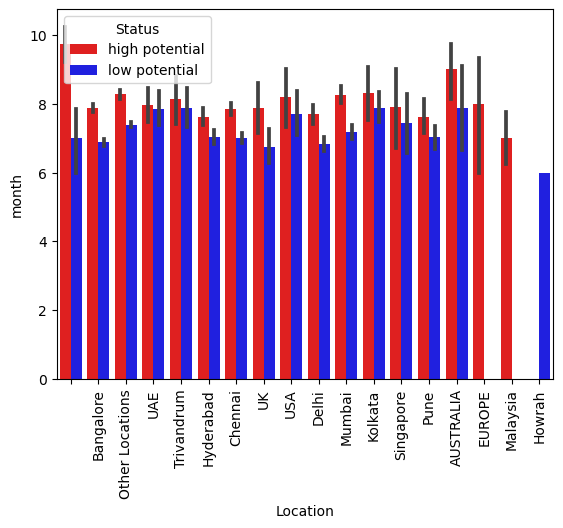

In [25]:
sns.barplot(x="Location",y="month",hue="Status",data=df,palette=["red","blue"])
plt.xticks(rotation=90)
plt.show()

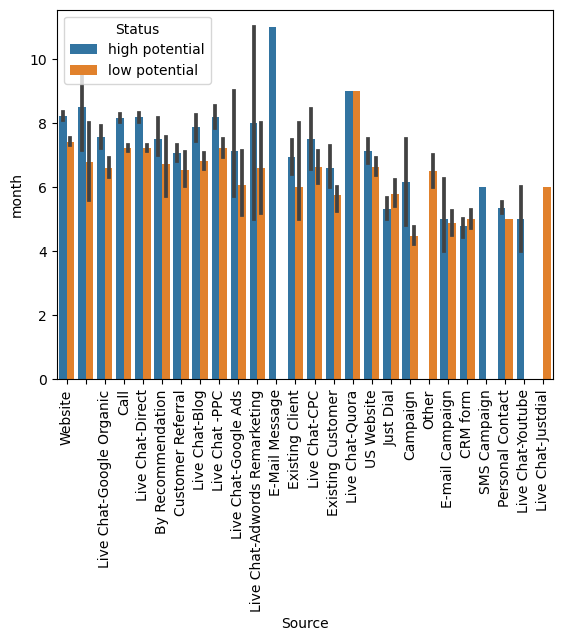

In [26]:
sns.barplot(x="Source",y="month",hue="Status",data=df)
plt.xticks(rotation=90)
plt.show()

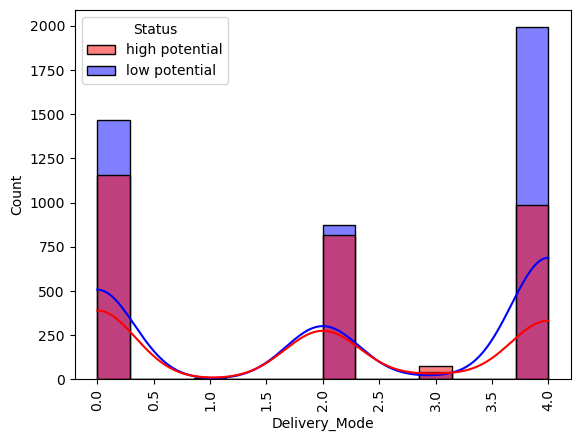

In [27]:
sns.histplot(x="Delivery_Mode",data=df,hue="Status",palette=["red","blue"],kde=True)
plt.xticks(rotation=90)
plt.show()

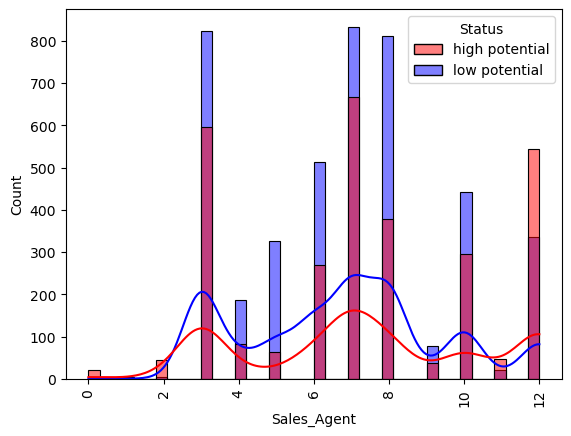

In [28]:
sns.histplot(x="Sales_Agent",data=df,hue="Status",palette=["red","blue"],kde=True)
plt.xticks(rotation=90)
plt.show()

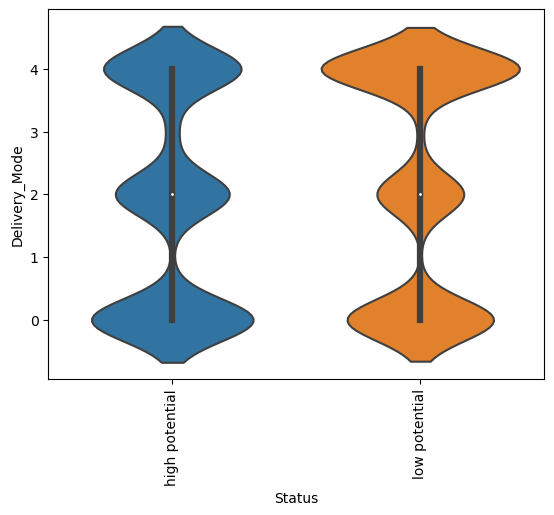

In [29]:
sns.violinplot(x="Status",y="Delivery_Mode",data=df)
plt.xticks(rotation=90)
plt.show()

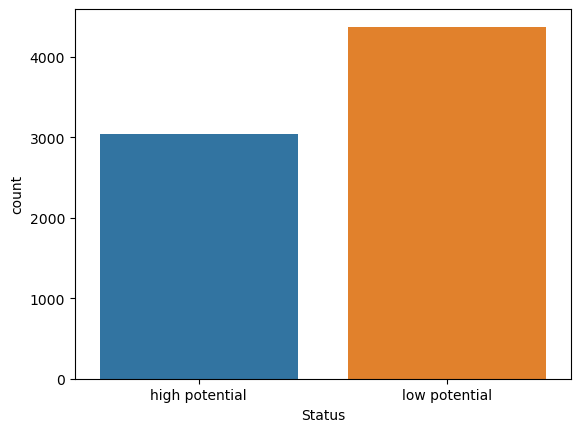

In [30]:
sns.countplot(x="Status",data=df) # given target column is unbalanced dataset.
plt.show()

In [31]:
df.columns

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status', 'year', 'month'],
      dtype='object')

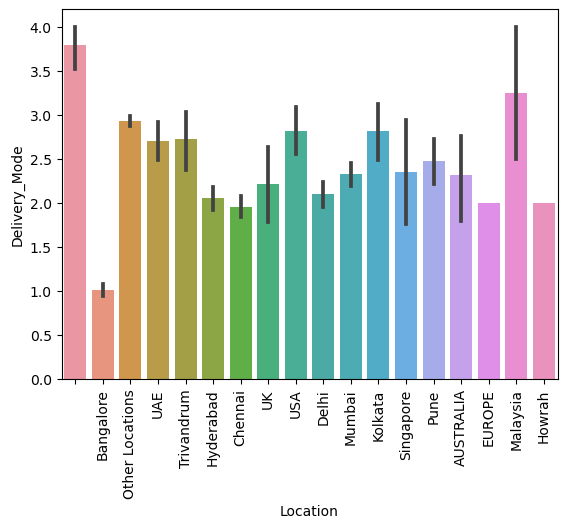

In [32]:
sns.barplot(x="Location",y='Delivery_Mode',data=df)
plt.xticks(rotation=90)
plt.show()


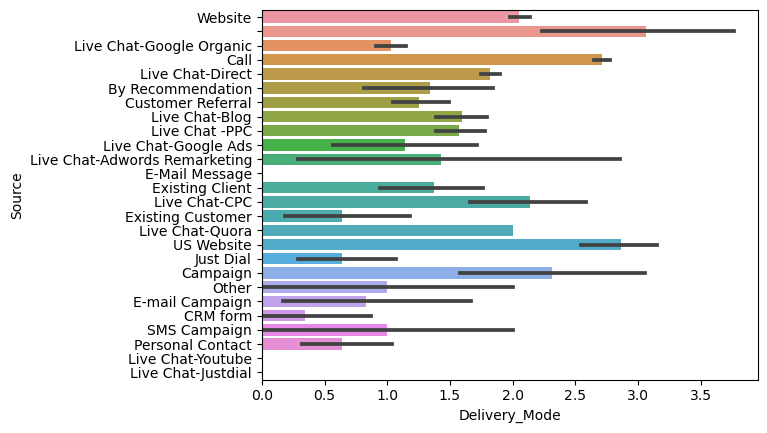

In [33]:
sns.barplot(y="Source",x='Delivery_Mode',data=df)
#plt.xticks(rotation=90)
plt.show()

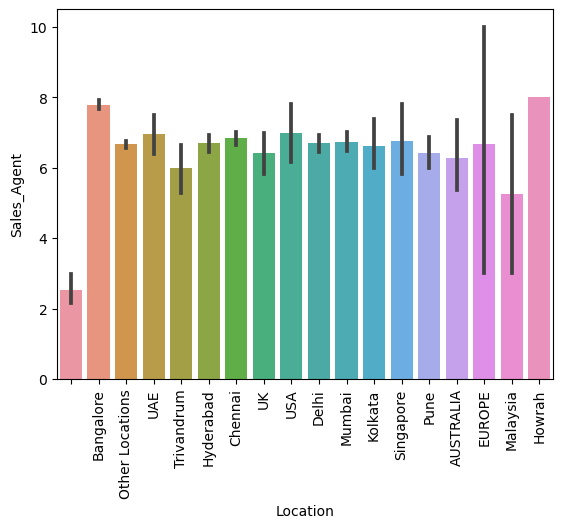

In [34]:
sns.barplot(x="Location",y='Sales_Agent',data=df)
plt.xticks(rotation=90)
plt.show()

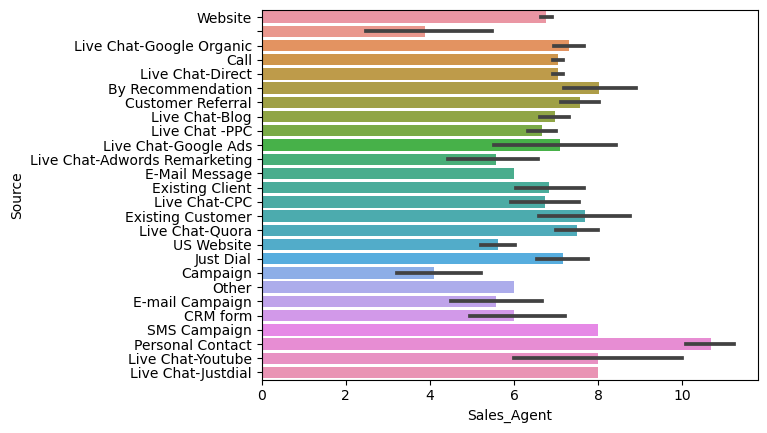

In [35]:
sns.barplot(y="Source",x='Sales_Agent',data=df)
#plt.xticks(rotation=90)
plt.show()

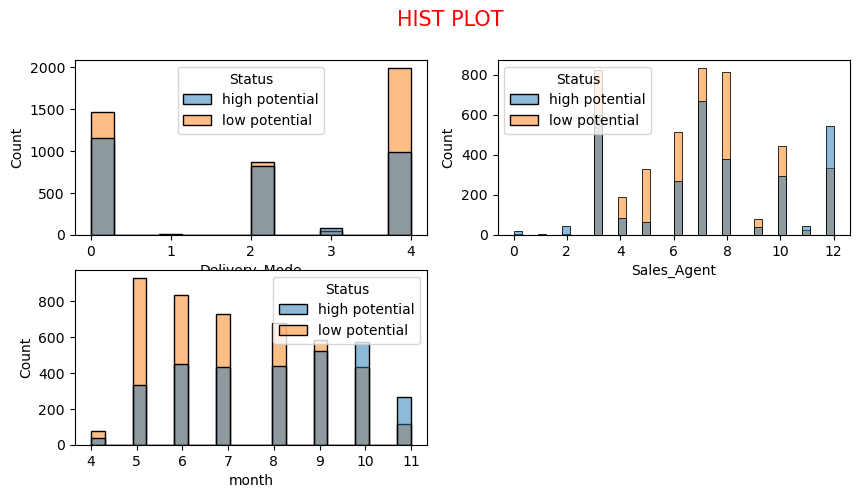

In [36]:
b=df[['Delivery_Mode','Sales_Agent',"month"]]
plt.figure(figsize=(10,5))
no=1
for i in b.columns:
    if no<=4:
        plt.suptitle("HIST PLOT",fontsize=15,color="red")
        plt.subplot(2,2,no)
        sns.histplot(x=b[i],hue="Status",data=df)
    no+=1

## statistical concept..

In [37]:
df.describe(include=["float","int"]).T

,count,mean,std,min,25%,50%,75%,max
Sales_Agent,7422.0,6.975344,2.874139,0.0,5.0,7.0,8.0,12.0
Delivery_Mode,7422.0,2.108596,1.739406,0.0,0.0,2.0,4.0,4.0
year,7422.0,2018.000000,0.000000,2018.0,2018.0,2018.0,2018.0,2018.0
month,7422.0,7.499461,1.877802,4.0,6.0,7.0,9.0,11.0


In [38]:
df.describe(include=["object"]).T

,count,unique,top,freq
Product_ID,7422,30,18,1711
Source,7422,26,Call,2547
Mobile,7422,487,,1810
EMAIL,7422,883,#VALUE!,1701
Location,7422,18,Other Locations,2500
Status,7422,2,low potential,4377


In [39]:
df.corr().T

,Sales_Agent,Delivery_Mode,year,month
Sales_Agent,1.000000,-0.232808,NaN,0.094388
Delivery_Mode,-0.232808,1.000000,NaN,0.130717
year,NaN,NaN,NaN,NaN
month,0.094388,0.130717,NaN,1.000000


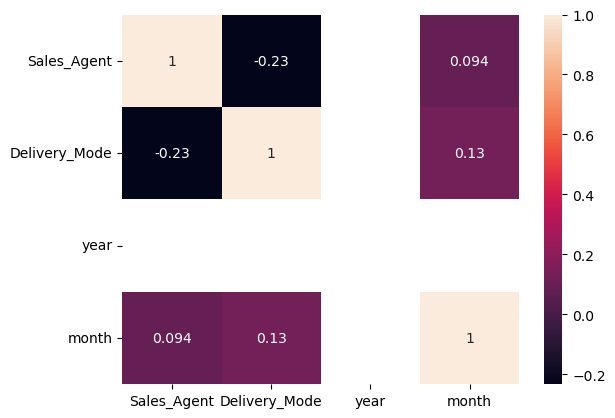

In [40]:
sns.heatmap(df.corr(),annot=True)
plt.show()

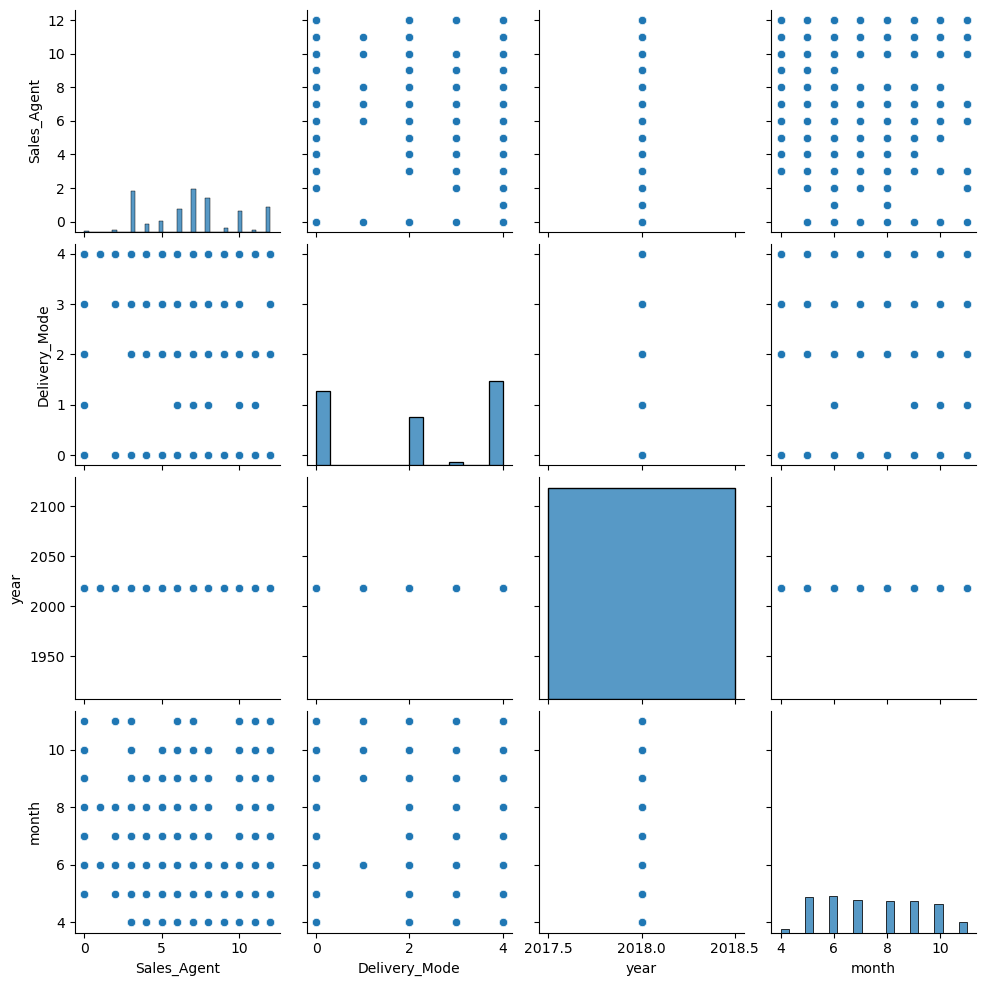

In [41]:
#multivariante analysis..
num=df.select_dtypes(include=["float","int"])
#num=num.drop(["Delivery_Mode"],axis=1)
sns.pairplot(data=num)
plt.show()

## Data preprocessing.

In [42]:
df.isna().sum() # check the NAN values

Created          0
Product_ID       0
Source           0
Mobile           0
EMAIL            0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
year             0
month            0
dtype: int64

In [43]:
# check the duplicates
df.duplicated().sum()

4

In [44]:
df.drop_duplicates(inplace=True)

In [45]:
df.duplicated().sum()

0

## feature engineering.

In [46]:
df["Status"]

0       high potential
1       high potential
2       high potential
3       high potential
4       high potential
             ...      
7417     low potential
7418     low potential
7419     low potential
7420    high potential
7421    high potential
Name: Status, Length: 7418, dtype: object

In [47]:
enc=LabelEncoder()
df.loc[:,["Source","Location","Status"]]=\
df.loc[:,["Source","Location","Status"]].apply(enc.fit_transform)

In [48]:
df2=df.drop(["EMAIL","Mobile","Created","Product_ID"],axis=1)
df2

,Source,Sales_Agent,Location,Delivery_Mode,Status,year,month
0,25,3,0,4,0,2018,11
1,25,2,0,4,0,2018,11
2,25,2,0,4,0,2018,11
3,25,2,0,4,0,2018,11
4,25,2,0,4,0,2018,11
...,...,...,...,...,...,...,...
7417,3,9,10,3,1,2018,4
7418,3,4,11,4,1,2018,4
7419,15,3,2,0,1,2018,4
7420,2,7,11,0,0,2018,4


In [49]:
x=df2.drop(["Status"],axis=1)
x

,Source,Sales_Agent,Location,Delivery_Mode,year,month
0,25,3,0,4,2018,11
1,25,2,0,4,2018,11
2,25,2,0,4,2018,11
3,25,2,0,4,2018,11
4,25,2,0,4,2018,11
...,...,...,...,...,...,...
7417,3,9,10,3,2018,4
7418,3,4,11,4,2018,4
7419,15,3,2,0,2018,4
7420,2,7,11,0,2018,4


In [50]:
y=df.Status
y

0       0
1       0
2       0
3       0
4       0
       ..
7417    1
7418    1
7419    1
7420    0
7421    0
Name: Status, Length: 7418, dtype: int32

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=42)

In [52]:
from imblearn.over_sampling import SMOTE,ADASYN,RandomOverSampler
smote=SMOTE(random_state=2)
x_sm,y_sm=smote.fit_resample(x_train,y_train)

## model building..

## 1)LogisticRegression

In [53]:
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,classification_report
log = LogisticRegression(penalty='l2', solver="lbfgs", class_weight="balanced")
pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"),StandardScaler(with_mean=False), log)
pipeline.fit(x_sm,y_sm)

Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced'))])

In [54]:
pipeline.score(x_sm,y_sm)
#pipeline.score(x_test,y_test) # similar to test accuracy
pre1=pipeline.predict(x_test)
train1=pipeline.score(x_sm,y_sm)
test1=accuracy_score(pre1,y_test)
print("train accuracy :",train1)
print("test accuracy :",test1)
print("f1_score :",f1_score(pre1,y_test))
print("recall_score :",recall_score(pre1,y_test))
print("precision_score :",precision_score(pre1,y_test))

train accuracy : 0.6777100787001777
test accuracy : 0.683288409703504
f1_score : 0.7251461988304093
recall_score : 0.7398568019093079
precision_score : 0.7110091743119266


In [55]:
pd.crosstab(pre1,y_test)

Status,0,1
row_0,,
0,197,126
1,109,310


In [56]:
print(classification_report(pre1,y_test))

              precision    recall  f1-score   support

           0       0.64      0.61      0.63       323
           1       0.71      0.74      0.73       419

    accuracy                           0.68       742
   macro avg       0.68      0.67      0.68       742
weighted avg       0.68      0.68      0.68       742



## 2)SVM

In [57]:
svm=SVC(C=0.9,gamma=0.001)
pipeline1 = make_pipeline(OneHotEncoder(handle_unknown="ignore"),StandardScaler(with_mean=False), svm)
pipeline1.fit(x_sm,y_sm)

Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('svc', SVC(C=0.9, gamma=0.001))])

In [58]:
#pipeline.score(x_test,y_test) # similar to test accuracy
pre2=pipeline1.predict(x_test)
train2=pipeline1.score(x_sm,y_sm)
test2=accuracy_score(pre2,y_test)
print("train accuracy :",train2)
print("test accuracy :",test2)
print("f1_score :",f1_score(pre2,y_test))
print("recall_score :",recall_score(pre2,y_test))
print("precision_score :",precision_score(pre2,y_test))

train accuracy : 0.6817720233561818
test accuracy : 0.7035040431266847
f1_score : 0.751131221719457
recall_score : 0.7410714285714286
precision_score : 0.7614678899082569


## 3)KNN

In [59]:
scores=[]
for i in range(50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    knn=KNeighborsClassifier(n_neighbors=5)
    pipeline3=make_pipeline(OneHotEncoder(handle_unknown="ignore"),StandardScaler(with_mean=False),knn)
    pipeline3.fit(x_sm,y_sm)
    y_pre1=pipeline3.predict(x_test)
    scores.append(accuracy_score(y_pre1,y_test))

In [60]:
print("test accuracy :",accuracy_score(y_pre1,y_test))
print("train accuracy :",pipeline3.score(x_sm,y_sm))
print("f1_score :",f1_score(y_pre1,y_test))
print("recall_score :",recall_score(y_pre1,y_test))
print("precision_score :",precision_score(y_pre1,y_test))

test accuracy : 0.7327044025157232
train accuracy : 0.7372429550647372
f1_score : 0.7719432732847834
recall_score : 0.7646165527714502
precision_score : 0.7794117647058824


## 4)DecisionTreeClassifier

In [61]:
dt=DecisionTreeClassifier(max_depth=200,min_samples_split=15,random_state=3,min_samples_leaf=30,max_features=6)
dt.fit(x_sm,y_sm)
pre4=dt.predict(x_test)
print("test accuracy :",accuracy_score(pre4,y_test))
print("train accuracy :",dt.score(x_sm,y_sm))
print("f1_score :",f1_score(pre4,y_test))
print("recall_score :",recall_score(pre4,y_test))
print("precision_score :",precision_score(pre4,y_test))

test accuracy : 0.7097933513027853
train accuracy : 0.6971312515866971
f1_score : 0.7382495948136144
recall_score : 0.7746598639455783
precision_score : 0.705108359133127


In [62]:
dt.score(x_test,y_test)

0.7097933513027853

## 5)RandomForestClassifier

In [63]:
rf=RandomForestClassifier(n_estimators=100,max_depth=400,max_features=6,random_state=3,
                          min_samples_leaf=30,min_samples_split=15)
rf.fit(x_sm,y_sm)
pre5=rf.predict(x_test)
print("test accuracy :",accuracy_score(pre5,y_test))
print("train accuracy :",rf.score(x_sm,y_sm))
print("f1_score :",f1_score(pre5,y_test))
print("recall_score :",recall_score(pre5,y_test))
print("precision_score :",precision_score(pre5,y_test))

test accuracy : 0.7192273135669363
train accuracy : 0.7083015993907082
f1_score : 0.7512932749701552
recall_score : 0.7731367731367731
precision_score : 0.7306501547987616


## 6)GradientBoostingClassifier

In [64]:
gb=GradientBoostingClassifier(subsample=1,n_estimators=200,criterion='squared_error',max_depth=3,
                              random_state=3,min_samples_leaf=15)
gb.fit(x_sm,y_sm)
pre6=gb.predict(x_test)
print("test accuracy :",accuracy_score(pre6,y_test))
print("train accuracy :",gb.score(x_sm,y_sm))
print("f1_score :",f1_score(pre6,y_test))
print("recall_score :",recall_score(pre6,y_test))
print("precision_score :",precision_score(pre6,y_test))

test accuracy : 0.7147349505840072
train accuracy : 0.6981467377506981
f1_score : 0.750294927251278
recall_score : 0.762589928057554
precision_score : 0.7383900928792569


## 7)XGBClassifier

In [65]:
xb=XGBClassifier(learning_rate=0.04,max_depth=15,subsample=0.5,min_child_weight=5,reg_alpha=1,random_state=3)
xb.fit(x_sm,y_sm)
pre7=xb.predict(x_test)
print("test accuracy :",accuracy_score(pre7,y_test))
print("train accuracy :",xb.score(x_sm,y_sm))
print("f1_score :",f1_score(pre7,y_test))
print("recall_score :",recall_score(pre7,y_test))
print("precision_score :",precision_score(pre7,y_test))

test accuracy : 0.7273135669362084
train accuracy : 0.727976643818228
f1_score : 0.7597942223981006
recall_score : 0.7773279352226721
precision_score : 0.7430340557275542


## 8) AdaBoostClassifier

In [66]:
ab=AdaBoostClassifier(estimator=dt)
ab.fit(x_sm,y_sm)
pre8=ab.predict(x_test)
print("test accuracy :",accuracy_score(pre8,y_test))
print("train accuracy :",xb.score(x_sm,y_sm))
print("f1_score :",f1_score(pre8,y_test))
print("recall_score :",recall_score(pre8,y_test))
print("precision_score :",precision_score(pre8,y_test))

test accuracy : 0.7942497753818508
train accuracy : 0.727976643818228
f1_score : 0.8201099764336214
recall_score : 0.8325358851674641
precision_score : 0.8080495356037152


### challenges faced

* Data Quality: The dataset has some missing or incorrectly formatted data, especially in the EMAIL and Mobile columns.

* Imbalanced Data: The target variable (Status) is imbalanced, making it harder to train models that can accurately predict all outcomes.

* Complex Relationships: The data shows complex relationships between variables, which could complicate analysis and require special techniques.

* Date-Time Handling: Splitting and transforming date-time data into separate features (like year and month) could be tricky.

* Database Issues: Connecting to a remote MySQL database might have posed challenges, such as connection problems or handling data changes.










* Model Comparisons: The notebook evaluates multiple classifiers, including RandomForestClassifier, GradientBoostingClassifier, XGBClassifier, and AdaBoostClassifier. Each model's performance is assessed based on metrics like accuracy, F1-score, recall, and precision.

* Best Performing Model: Among the models tested, the AdaBoostClassifier achieved the highest test accuracy of 79.42%, along with a strong F1-score of 82.01%, recall of 83.25%, and precision of 80.80%. This indicates that AdaBoost was the most effective model for this specific dataset.

* Model Insights: The varying performance of the models highlights the importance of trying different algorithms, especially when dealing with imbalanced data. AdaBoost's superior performance suggests that it handled the imbalanced classes better than the others.

#### Conclusion:
  The project successfully built and evaluated multiple machine learning models to predict sales outcomes. The AdaBoostClassifier emerged as the best-performing model, providing robust predictions on the test set. The project demonstrates the importance of model selection and the impact of handling imbalanced data on prediction accuracy. 






